<a href="https://colab.research.google.com/github/Justinr2940/Summer-Micro-Credential/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this analysis is to predict the rate in which someone might have a heart_attack based on many factors such as smoking or wieght


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Justinr2940/Summer-Micro-Credential/main/heart_attack.csv")

In [3]:
df.head()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.describe()
#Looking at the total values in each row and column

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.isnull()
#Looking for any null values

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3652,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3653,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3654,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.head(-1)


,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,0,50,1.0,0,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
3651,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1


In [7]:
df['heart_attack'].value_counts()
#the number of people who had a heart-attack wthin the data set

0    3099
1     557
Name: heart_attack, dtype: int64

#Data Visualizations

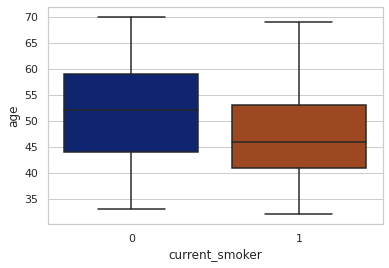

In [8]:
sns.set_style('whitegrid')
sns.boxplot(x = 'current_smoker', y = 'age', data = df, palette = 'dark')

Based on the graph above it can be seen that smokers fall between the age range of 60 and 45 and are usually older than non-smokers who fall between the age range of 40 and 55

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


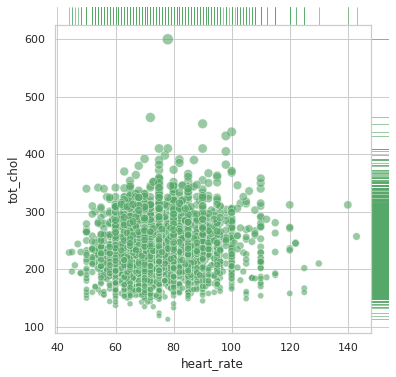

In [9]:
g = sns.JointGrid(data=df , x="heart_rate", y="tot_chol", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=df['tot_chol'], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

The graph above alows me to see he correlation between how someones cholesterol affects their heart rate

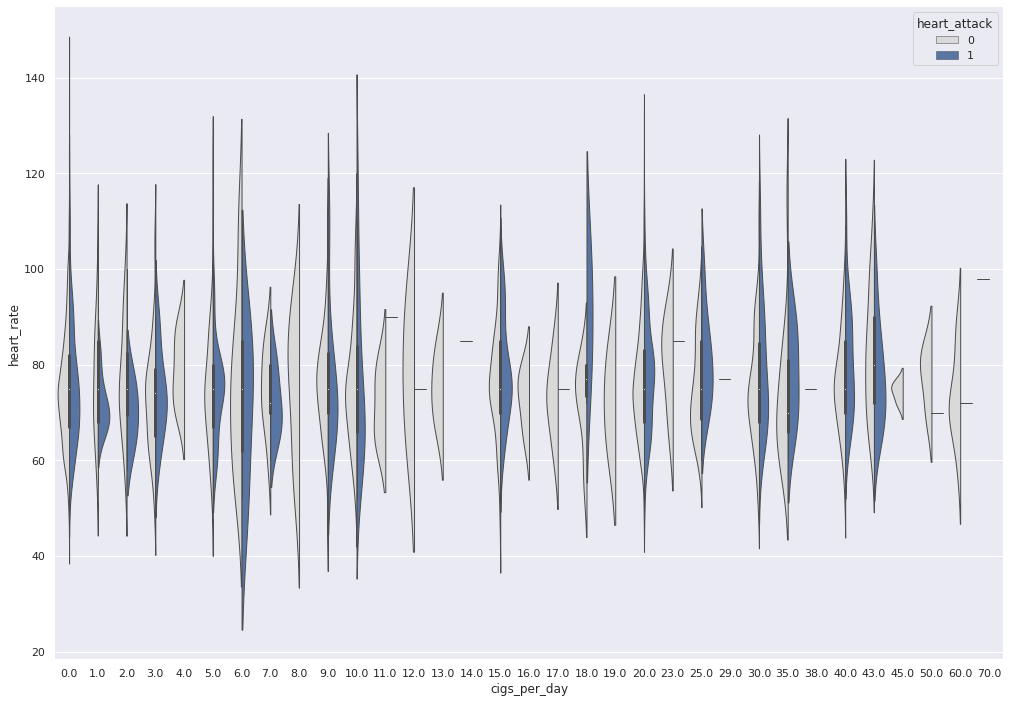

In [10]:
sns.set(rc = {'figure.figsize':(17,12)})
sns.violinplot(data=df, x="cigs_per_day", y="heart_rate", hue="heart_attack" , split=True, linewidth=1, palette={1: "b", 0: ".85"})
sns.despine(left=True)

From the looks of this graph a persons lower heart rate has a higher chance to lead to a heart attack than the amount of ciggaretts they smoke seeing as a majority of the heart attacks that happened were with people that smoked betweem 0 and 10 cigarretts 

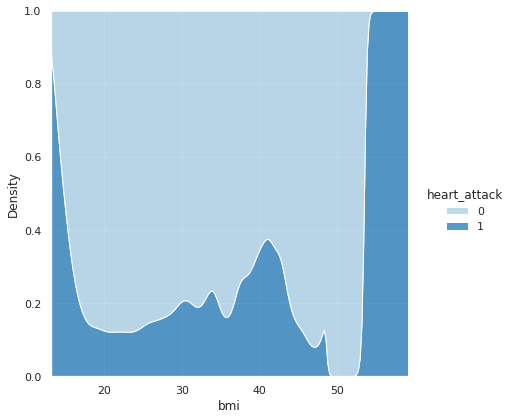

In [11]:
sns.displot(
    data=df,
    x="bmi", hue="heart_attack",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Paired"
)

BMI or body mass index shows how over weight someone is where over 30 is over-weight and under 25 is under-weight. From this graph we can see that heart-attack occurences had the highest density when their bmi was extremly high or extremly low

##Logistic regression 1

In [12]:
#Splitting the data for logistic regression
from sklearn.model_selection import train_test_split
X = df.drop(['heart_attack'], axis=1)
y = df['heart_attack']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1000, random_state=5)

In [13]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#Create Logstic regression model
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
#Making predictions
print("the preditction accuracy of the model is ", classifier.score(X_test, y_test)*100, '%')
pp = classifier.predict(X_test)
yes= 0
no = 0
for i in pp:
  if (i == 1):
    yes += 1
  else:
    no += 1
print('The number of people likely to have a heart attack out of 1000 likely to have a heart attack is: ', yes)
print('The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is: ', no)

the preditction accuracy of the model is  84.6 %
The number of people likely to have a heart attack out of 1000 likely to have a heart attack is:  24
The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is:  976


##Logistic regression 2

In [16]:
#Splitting the data for the second logistic regression
X = df.drop(['heart_attack'], axis=1)
y = df['heart_attack']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.6, random_state=5)#Using a larger test size to see different results and check model accuracy

In [17]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#Create Logstic regression model
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
#Making predictions
print("the preditction accuracy of the model is ", classifier.score(X_test, y_test)*100, '%')
pp = classifier.predict(X_test)
yes= 0
no = 0
for i in pp:
  if (i == 1):
    yes += 1
  else:
    no += 1
print('The number of people likely to have a heart attack out of 1000 likely to have a heart attack is: ', yes)
print('The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is: ', no)

the preditction accuracy of the model is  84.5031905195989 %
The number of people likely to have a heart attack out of 1000 likely to have a heart attack is:  59
The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is:  2135


The accurcy of the model slightly drops as we raise the test size to over 2000

##Logistic regression 3

In [20]:
#Splitting the data for the third logistic regression
X = df.drop(['heart_attack'], axis=1)
y = df['heart_attack']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=500, random_state=5) #using the smallest test size of 500

In [21]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
#Create Logstic regression model
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [23]:
#Making predictions
print("the preditction accuracy of the model is ", classifier.score(X_test, y_test)*100, '%')
pp = classifier.predict(X_test)
yes= 0
no = 0
for i in pp:
  if (i == 1):
    yes += 1
  else:
    no += 1
print('The number of people likely to have a heart attack out of 1000 likely to have a heart attack is: ', yes)
print('The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is: ', no)

the preditction accuracy of the model is  87.6 %
The number of people likely to have a heart attack out of 1000 likely to have a heart attack is:  9
The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is:  491


The accuracy of the model increased by 3 percent as the test size dropped by half from the first logistic regression

##KNN Model1

The KNN model will have the same data split values as the logistic regression in order to test the accuracy of each models

In [24]:
X = df.drop(['heart_attack'], axis=1)
y = df['heart_attack']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1000, random_state=5)
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       840
           1       0.34      0.08      0.13       160

    accuracy                           0.83      1000
   macro avg       0.59      0.53      0.52      1000
weighted avg       0.77      0.83      0.78      1000



According to the classification report the knn model has an 82 percent accuracy rate

In [27]:
yes= 0
no = 0
for i in pred:
  if (i == 1):
    yes += 1
  else:
    no += 1
print('The number of people likely to have a heart attack out of 1000 likely to have a heart attack is: ', yes)
print('The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is: ', no)

The number of people likely to have a heart attack out of 1000 likely to have a heart attack is:  38
The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is:  962


In [28]:
error_rate = []
for i in range (1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  #Function for the error rate of the knn model


Text(0, 0.5, 'Error Rate')

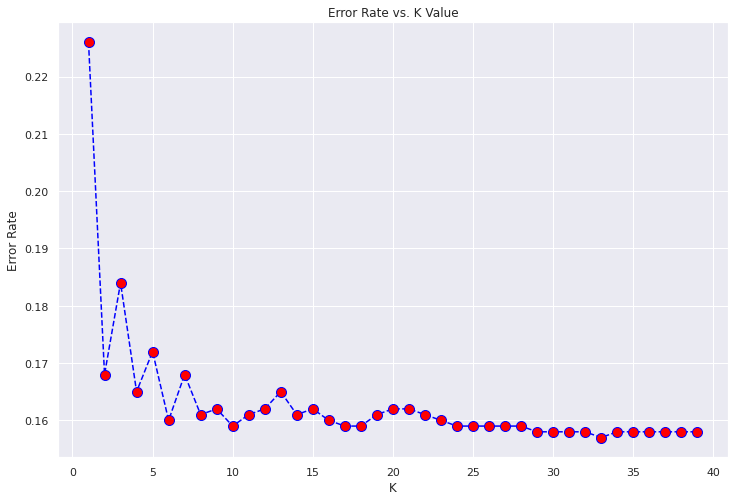

In [29]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle='dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')
#Table to plot the error rate of the knn model 

#KNN model 2

The test size for the model will be 1000 as well but the n_neighbors will be changed to 3

In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       840
           1       0.57      0.03      0.05       160

    accuracy                           0.84      1000
   macro avg       0.71      0.51      0.48      1000
weighted avg       0.80      0.84      0.77      1000



In [31]:
yes= 0
no = 0
for i in pred:
  if (i == 1):
    yes += 1
  else:
    no += 1
print('The number of people likely to have a heart attack out of 1000 likely to have a heart attack is: ', yes)
print('The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is: ', no)

The number of people likely to have a heart attack out of 1000 likely to have a heart attack is:  7
The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is:  993


The accuracy of the model rose when increasing the number of n_neighbors but the predictions are significantly different

In [32]:
error_rate = []
for i in range (1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  #Function for the error rate of the knn model


Text(0, 0.5, 'Error Rate')

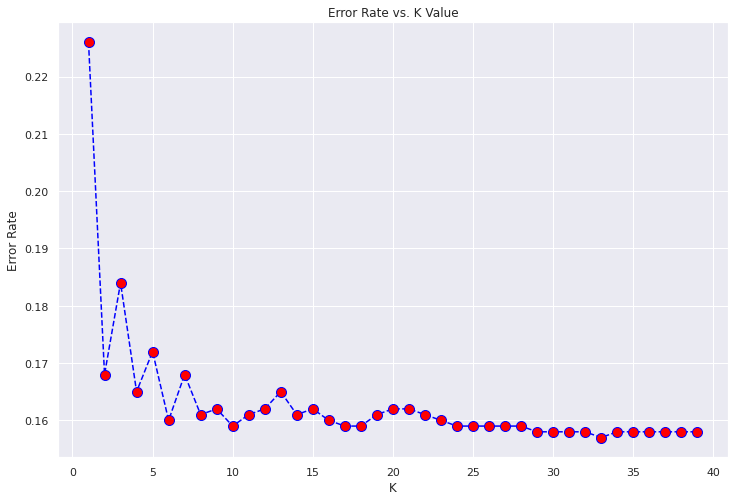

In [33]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle='dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')
#Table to plot the error rate of the knn model 

#KNN Model3

This KNN model will have an n_neighbors value of 2


In [34]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       840
           1       0.26      0.23      0.24       160

    accuracy                           0.77      1000
   macro avg       0.56      0.55      0.55      1000
weighted avg       0.76      0.77      0.77      1000



In [35]:
yes= 0
no = 0
for i in pred:
  if (i == 1):
    yes += 1
  else:
    no += 1
print('The number of people likely to have a heart attack out of 1000 likely to have a heart attack is: ', yes)
print('The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is: ', no)

The number of people likely to have a heart attack out of 1000 likely to have a heart attack is:  138
The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is:  862


The accuracy of the model rose when increasing the numbe rof n_neighbors but the predictions are significantly different

In [36]:
error_rate = []
for i in range (1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  #Function for the error rate of the knn model


Text(0, 0.5, 'Error Rate')

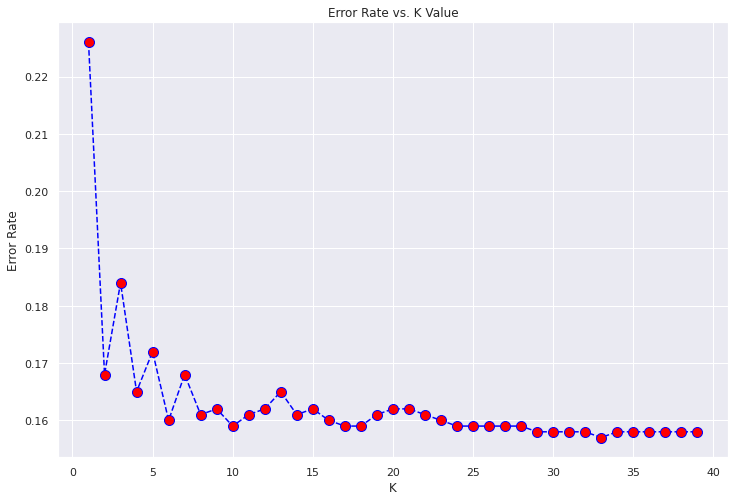

In [37]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle='dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')
#Table to plot the error rate of the knn model 

#Decision Tree 1

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1000, random_state=5) #using the test size of 1000
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       840
           1       0.26      0.26      0.26       160

    accuracy                           0.76      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.76      0.76      0.76      1000



The accuracy of the deciion tree model with a test size of 1000 is 76 percent

In [42]:
yes= 0
no = 0
for i in predictions:
  if (i == 1):
    yes += 1
  else:
    no += 1
print('The number of people likely to have a heart attack out of 1000 likely to have a heart attack is: ', yes)
print('The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is: ', no)

The number of people likely to have a heart attack out of 1000 likely to have a heart attack is:  163
The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is:  837


#Decision tree 2

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=2600, random_state=5) #Settting a decision tree with a test size of 2600 the largest
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2186
           1       0.23      0.26      0.24       414

    accuracy                           0.74      2600
   macro avg       0.54      0.55      0.54      2600
weighted avg       0.76      0.74      0.75      2600



The accuracy of the deciion tree model with a test size of 26 is 74 percent

In [45]:
yes= 0
no = 0
for i in predictions:
  if (i == 1):
    yes += 1
  else:
    no += 1
print('The number of people likely to have a heart attack out of 1000 likely to have a heart attack is: ', yes)
print('The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is: ', no)

The number of people likely to have a heart attack out of 1000 likely to have a heart attack is:  435
The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is:  2165


#Decision tree 3

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=300, random_state=5) #using the smallest test size of 300
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       259
           1       0.22      0.22      0.22        41

    accuracy                           0.79       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.79      0.79      0.79       300



The accuracy of the deciion tree model with a test size of 300 is 79 percent

In [50]:
yes= 0
no = 0
for i in predictions:
  if (i == 1):
    yes += 1
  else:
    no += 1
print('The number of people likely to have a heart attack out of 1000 likely to have a heart attack is: ', yes)
print('The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is: ', no)

The number of people likely to have a heart attack out of 1000 likely to have a heart attack is:  41
The number of people not likely to have a heart attack out of 1000 likely to have a heart attack is:  259


#Conclusion

Using all three models and with different test sizes the only conclusion to come to is that a person is less likely to have a heart attack without extrenuating circumstances. While looking at the logistic regression model as the test size rose the accuracy may have dropped slightly but the predictions were still similar, a majority of the test size predicted ne heart attack. Then while looking at the KNN model, as the number of n_neighbors decreased there were more people predicted to have a heart attack but the majority of the test size were predicted to not have a heart attack. The decision tree model had predicted the largest number of the stest size to have a heart attack. The decision tree had predicted that out of 2600 people 435 would have a hear attack, but even with an accuracy of 77, the majority of the test size were predicted to not have a heart attack. 